# Agent-Based Simulation of the Diffusion Model of Flagellar Length Control
#### By Nathan L. Hendel, Developed in Wallace F. Marshall's lab at UCSF

This tutorial goes over the files for the agent-based simulation of the diffusion model. In this model, flageller length is regulated by the diffusive return of kinesin-2 motors. This simulation models every motor and tracks its position and state as it moves along the flagellum and changes its length. The results of this model are detailed in Hendel et al., 2017. https://pubmed.ncbi.nlm.nih.gov/29414712/

In this tutorial, I will demonstrate how to use the model.

### Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ift_diffusion_model_nlh import Cell

### Running the simulation
The simulation takes several optional parameters if you want to change the physical parameters of the system. But to run a simulation with just the defaults, we can simply run:

In [3]:
flag = Cell()
flag

Cell of length 7.6934999999841045 microns and populated by 200 motors

The steady-state length in the simulation is in the L attribute.

In [4]:
flag.L

7.6934999999841045

We can plot the length of the flagellum over time easily.

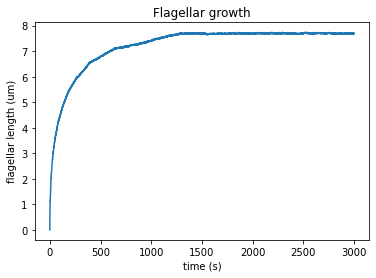

In [5]:
flag.L_plot()

The array of lengths over time is called L_trace. The plot above is simply plt.plot(flag.L_trace). To just get the last time points, you can run the following line. In this case, we're plotting the last 5000 time points.

Text(0, 0.5, 'flagellar length (um)')

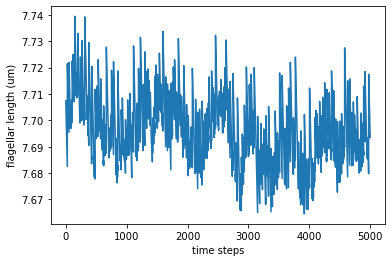

In [10]:
plt.plot(flag.L_trace[-5000:])
plt.xlabel('time steps')
plt.ylabel('flagellar length (um)')

We can also put in whatever parameters we want, instead of using the defaults. The basic parameters are:

D: diffusion coefficient

v: IFT speed

build_size: amount of cargo on each motor (delta in Hendel et al., 2017)

decay_size: rate of flagellar shortening (d in Hendel et al., 2017)

In [6]:
low_D = Cell(D=1)
medium_D = Cell(D=2)
high_D = Cell(D=10)

Text(0, 0.5, 'steady-state length (um)')

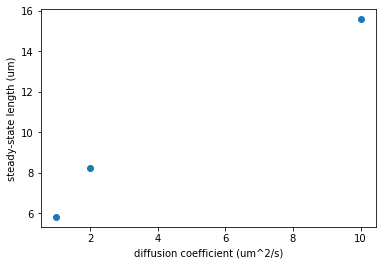

In [8]:
plt.scatter([1,2,10],[low_D.L, medium_D.L, high_D.L])
plt.xlabel('diffusion coefficient (um^2/s)')
plt.ylabel('steady-state length (um)')

In [6]:
flag

Cell of length 7.742249999984108 microns and populated by 200 motors

In [7]:
flag.motors

[Motor at position 5.934176065054234 and state diffusion,
 Motor at position 7.117642021674154 and state diffusion,
 Motor at position 7.150642021674146 and state diffusion,
 Motor at position 5.936176065054235 and state diffusion,
 Motor at position 2.4 and state IFT,
 Motor at position 7.703249999984146 and state diffusion,
 Motor at position 4.153102130124361 and state diffusion,
 Motor at position 5.9291760650542615 and state diffusion,
 Motor at position 7.121642021674155 and state diffusion,
 Motor at position 2.4 and state IFT,
 Motor at position 7.150642021674146 and state diffusion,
 Motor at position 5.933926065054237 and state diffusion,
 Motor at position 2.3725281951945236 and state diffusion,
 Motor at position 0 and state base,
 Motor at position 4.750210108434326 and state diffusion,
 Motor at position 7.742249999984108 and state diffusion,
 Motor at position 5.938426065054232 and state diffusion,
 Motor at position 2.4 and state IFT,
 Motor at position 2.4 and state IF

Text(0, 0.5, 'position (um)')

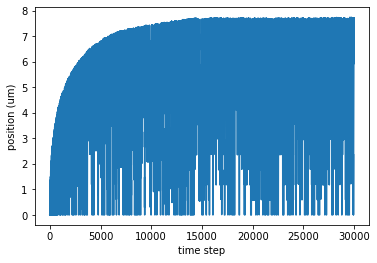

In [15]:
plt.plot(flag.motors[0].track)
plt.xlabel('time step')
plt.ylabel('position (um)')

In [16]:
flag.L_predict #the L.predict function computes the expected length as calculated by the equation in Ma, Hendel et al 20202.

7.379733490549528

Text(0, 0.5, 'avalanche size (motors)')

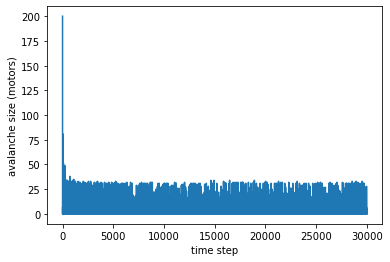

In [12]:
plt.plot(flag.avaT)
plt.xlabel('time step')
plt.ylabel('avalanche size (motors)')

How it works:
1. Initialize cell (class Cell), set physical parameters, populate with motors (class Motor)
2. Simulate over time:
        For each time step:
                For each motor:
                    if motor is in IFT:
                            increase its position
                            if its position equals the length of the flagellum:
                                increase the length of the flagellum
                                change state of motor to diffusion
                    else if motor is in diffusion:
                            move it randomly left or right
                                 if it exceeds the length of the flagellum, move it back to the length
                                 if it gets back to the base (position 0):
                                       change its state to base
                    else if motor is in the base:
                             keep position at 0
                             if the number of motors at the base is above the parametere thresh (avalanching threshold):
                                  generate random number (weibull distribution), change the state of that number of motors from base to IFT
                Decrease length of the flagellum by decay_size

The time step is a parameter too, you can use a smaller time step to get a more precise simulation. It takes longer though. The time step is in units of seconds.

In [24]:
small_tstep = Cell(t_step=.01)
small_tstep.L

7.83260000006128

Other functions:
- is_steadystate: checks to see if the flagellum has reached steady-state length. The way this function is written, it computes the best fit line for the last fit_range number of points and if the absolute value of the slope is less than eps, it considers it steady-state. If ss=True in the original initiation of the Cell, the flagellum will keep extending the number of time steps in the simulation until is_steadystate returns True. Default, this is off, but sometimes its nice to have on in case you're running a lot of simulations and you don't want results from flagella that are still growing.

- L_hog: Hand Of God. If non-zero, the flagella length will multiply by the value. This was useful in one figure in the 2017 paper "Diffusion as a Ruler" in the figure panel where we show that manually changing the length of the flagellum will still result in the same steady-state length. Default off.

- Extend: Keeps running the simluation with extend_time more time steps. This requires some lists that keep track of outputs to extend, like L_trace, flux, base, motor tracks. Useful if a cell isn't at steady state and you'd like it to be. Often I will just start a simulation over with a longer simulation time, so this isn't too useful.

Now a little bit on the two-flagella model. Import the two-flagella file:

In [25]:
from ift_diffusion_model_two_flagella import Cell as Cell2

In [14]:
twoflag = Cell2()

In [15]:
print(twoflag.L0, twoflag.L1)

8.766563389252259 8.718979088273933


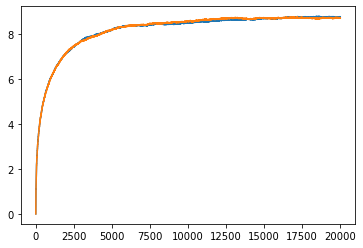

In [19]:
plt.plot(twoflag.L0_trace)
plt.plot(twoflag.L1_trace)

The two new parameters are k_tub and tubulin. The amount of building material each injected motor takes with it is proportional to the amount of tubulin remaining, which is k_tub*(tubulin - L0 - L1).

In [21]:
twoflag_large_ktub_low_tubulin = Cell2(k_tub=.001, tubulin=10)

Text(0, 0.5, 'length (um)')

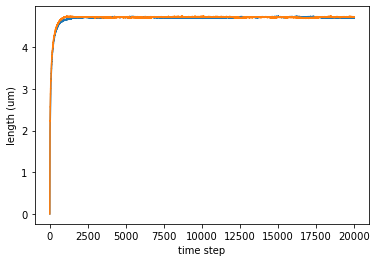

In [23]:
plt.plot(twoflag_large_ktub_low_tubulin.L0_trace)
plt.plot(twoflag_large_ktub_low_tubulin.L1_trace)
plt.xlabel('time step')
plt.ylabel('length (um)')

Notice here that the sum of the two lengths is limited by the amount of tubulin.

For more information, contact Nathan Hendel at nat.hendel@gmail.com or reference these papers:

1. Diffusion as a Ruler: Modeling Kinesin Diffusion as a Length Sensor for Intraflagellar Transport (2018). This paper describes the agent-based model, the simulation files shown in this tutorial were used extensively in this paper. https://pubmed.ncbi.nlm.nih.gov/29414712/

2. Speed and Diffusion of Kinesin-2 Are Competing Limiting Factors in Flagellar Length-Control Model. This paper uses an analytical solution using differential equations. It does not use this agent-based simulation but it is a good reference for seeing the equations that describe the model and how to predict what parameter changes lead to what changes in lengths.
https://pubmed.ncbi.nlm.nih.gov/32365327/